# PI7 Assignment 

## Deel 1
In dit notebook voer ik de vereiste stappen uit van de PI7-opdracht.  
Ik analyseer de SQL-database, extraheer de data naar Python, voer een uitgebreide Exploratory Data Analysis (EDA) uit en onderzoek de datakwaliteit.  
Daarnaast beschrijf ik de noodzakelijke voorbereidingen voor verdere machine-learning analyse en realiseer ik de volledige datacleaning-pipeline.

# Overzicht van de Database

Deze database bestaat uit twee tabellen die met elkaar verbonden zijn via een foreign key.

## Tabellen en Relaties

De hoofdtabellen zijn:

- **race_results**
- **riders**

De relatie tussen beide tabellen loopt via **rider_id**, welke fungeert als primary key in `riders` en als foreign key in `race_results`.


## Kolommen per Tabel

![image info](./images/ERD.png)

In de afbeelding staat ook aangegeven welk datatype elke feature heeft:
 - `A-Z`: string
 - `123`: integers/float (dit onderscheid wordt later in de notebook besproken)

### Grootte en compleetheid worden later in de notebook besproken

# Extractie van de SQL-database naar Python

In deze stap wordt de SQLite-database ingeladen in een Python-omgeving en omgezet naar pandas DataFrames. 
Dit wordt ook wel deserialisatie genoemd: de data wordt gelezen uit een persistente opslag (de .db file) en omgezet naar objecten die in het geheugen van Python gebruikt kunnen worden.

## Stappen in het conversieproces

1. Importeren van libraries  
De benodigde Python-libraries worden geïmporteerd. Hierbij wordt:
    - `sqlite3` gebruikt om verbinding te maken met de SQLite-database;

    - `os` gebruikt om het pad naar de database samen te stellen;

    - `pandas` gebruikt om SQL-tabellen om te zetten naar DataFrames;

    - `seaborn` en `matplotlib` later gebruikt voor visualisatie.

2. Opzetten van de databaseverbinding
Met behulp van sqlite3.connect() wordt een verbinding gemaakt met het databasebestand cycling_db.db, dat zich bevindt in de map data.

3. Uitlezen van tabellen
De SQL-tabellen riders en race_results worden met pd.read_sql_query() uitgelezen. Elke tabel wordt opgeslagen in een apart pandas DataFrame (df_rider en df_race_results). Hierdoor kunnen de tabellen eenvoudig geanalyseerd en gemanipuleerd worden binnen Python.

4. Sluiten van de verbinding
Na het inladen van de data wordt de databaseverbinding gesloten met conn.close(). Dit is een goede praktijk om resources vrij te geven en mogelijke locks op de database te voorkomen.

## Resultaat

Na deze stap zijn de SQL-tabellen succesvol geëxtraheerd en beschikbaar als twee afzonderlijke pandas DataFrames. Deze DataFrames vormen de basis voor verdere data-analyse, datacleaning en visualisatie in de notebook.

In [23]:
import sqlite3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# Pad naar database
db_path = os.path.join("data", "cycling_db.db")
conn = sqlite3.connect(db_path)

# Lees tabellen in als DataFrame
df_riders = pd.read_sql_query("SELECT * FROM riders;", conn)
df_race_results = pd.read_sql_query("SELECT * FROM race_results;", conn)

conn.close()

Controle of `riders` tabel correct is opgeslagen als dataframe

In [24]:
df_riders.head()


,rider_id,fullname,team,birthdate,country,height,weight,rider_url,pps,rdr
0,5e4c220d0657face20e49719b725a001,BARDET Romain,Team DSM,1990-11-09,France,1.84,65.0,https://www.procyclingstats.com/rider/romain-b...,"{'One day races': '2620', 'GC': '5138', 'Time ...","{'PCS Ranking': '43', 'UCI World Ranking': '52..."
1,995d110d3b2e05830409874b401a3218,DUMOULIN Samuel,noteam,1980-08-20,France,1.59,57.0,https://www.procyclingstats.com/rider/samuel-d...,"{'One day races': '3681', 'GC': '1277', 'Time ...",{'Specials | All Time Ranking': '365'}
2,21b52056733e39f06885dfb9d18bc77a,GALLOPIN Tony,AG2R Citroën Team,1988-05-24,France,1.80,69.0,https://www.procyclingstats.com/rider/tony-gal...,"{'One day races': '2864', 'GC': '2268', 'Time ...","{'PCS Ranking': '511', 'UCI World Ranking': '9..."
3,3fe13c77eb187357fa58c810a7aa7083,NAESEN Oliver,AG2R Citroën Team,1990-09-16,Belgium,1.84,72.0,https://www.procyclingstats.com/rider/oliver-n...,"{'One day races': '3619', 'GC': '1157', 'Time ...","{'PCS Ranking': '203', 'UCI World Ranking': '1..."
4,ae00cdf6b464b193c1a34e08fe1eded7,FRANK Mathias,noteam,1986-12-09,Switzerland,1.76,64.0,https://www.procyclingstats.com/rider/mathias-...,"{'One day races': '702', 'GC': '2803', 'Time t...","{'PCS Ranking': '755', 'UCI World Ranking': '9..."


Controle of `race_results` tabel correct is opgeslagen als dataframe

In [25]:
df_race_results.head()

,id,Rnk,GC,Timelag,BiB,Rider,Age,Team,UCI,Pnt,...,Stage_Type,Start,Finish,Race_ID,Stage_Number,Length,Category,Race_url,Stage_url,rider_id
0,1,1,1.0,+0:00,0,GREIPEL André,29,Lotto Belisol Team,6.0,50.0,...,RR,Prospect,Clare,0,1,149 km,ME - Men Elite,race/tour-down-under/2012,/stage-1/result/result,659ed585810c65fe22255a5e4a9b7838
1,2,2,2.0,+0:04,0,PETACCHI Alessandro,38,Lampre - ISD,4.0,30.0,...,RR,Prospect,Clare,0,1,149 km,ME - Men Elite,race/tour-down-under/2012,/stage-1/result/result,None
2,3,3,4.0,+0:06,0,HUTAROVICH Yauheni,28,FDJ - BigMat,2.0,18.0,...,RR,Prospect,Clare,0,1,149 km,ME - Men Elite,race/tour-down-under/2012,/stage-1/result/result,None
3,4,4,8.0,+0:10,0,SABATINI Fabio,26,Liquigas - Cannondale,1.0,13.0,...,RR,Prospect,Clare,0,1,149 km,ME - Men Elite,race/tour-down-under/2012,/stage-1/result/result,13ed0fc8c2b0dcd2c4e1ac48b88166b8
4,5,5,9.0,+0:10,0,BENNATI Daniele,31,RadioShack - Nissan,1.0,10.0,...,RR,Prospect,Clare,0,1,149 km,ME - Men Elite,race/tour-down-under/2012,/stage-1/result/result,c0c77a7b1a8b55d9641962ba21981cab


## Grootte en structuur van de dataset

De dataset bestaat uit twee gerelateerde tabellen: `race_results` en `riders`. Samen vormen deze tabellen een uitgebreide weergave van wielerwedstrijden en de bijbehorende renners.

## Structuur, datatypes en compleetheid van `race_results`

De tabel `race_results` bestaat uit **225.918 entries** en **25 features**, waarbij elke rij een individuele wedstrijduitslag van een renner representeert. De dataset is daardoor geschikt voor gedetailleerde analyses op renner-, etappe- en wedstrijdniveau.

### Datatypes van features

De features in deze tabel bestaan uit een mix van **numerieke** en **categorische** variabelen. Enkele kolommen, zoals `id`, `Age`, `Circuit`, `Race_ID` en `Stage_Number`, zijn opgeslagen als **integers** en lenen zich direct voor numerieke analyses.

Daarnaast zijn er meerdere kolommen met het datatype `float64`, waaronder `GC`, `UCI` en `Pnt`. Deze representeren onder andere klassementsposities en punten, maar bevatten niet voor elke observatie een waarde.

Een groot deel van de dataset bestaat uit **object-typen (strings)**, zoals `Rnk`, `Time`, `Timelag`, `Date`, `Length` en locatie- of naamgerelateerde features (`Race_Name`, `Stage_Name`, `Start`, `Finish`). Hoewel sommige van deze kolommen numerieke of temporele informatie bevatten, zijn ze momenteel als tekst opgeslagen en vereisen zij verdere preprocessing (bijvoorbeeld conversie naar numerieke waarden of datetime-objecten).

### Compleetheid van de data

De dataset is grotendeels compleet, maar bevat duidelijke verschillen in de mate van ontbrekende waarden per feature:

- Kolommen zoals `id`, `Rnk`, `Rider`, `Age`, `Time` en `Race_Name` zijn volledig gevuld.
- `GC` en `Timelag` missen waarden voor ongeveer **13%** van de observaties, wat erop wijst dat deze informatie niet voor alle renners of wedstrijdtypes beschikbaar is.
- De kolommen `UCI` en `Pnt` bevatten slechts een klein aantal niet-lege waarden, wat suggereert dat UCI-punten en wedstrijdpunten alleen voor specifieke wedstrijden of posities worden toegekend.
- `Stage_Name` en `Stage_url` ontbreken bij een deel van de data, waarschijnlijk bij eendaagse wedstrijden zonder etappestructuur.
- De foreign key `rider_id` is niet volledig gevuld, wat aandacht vereist bij het uitvoeren van joins met de `riders`-tabel.

### Conclusie

De tabel `race_results` is omvangrijk en rijk aan informatie, maar bevat meerdere features die verdere datacleaning en typeconversie vereisen. Vooral tekstuele representaties van numerieke en temporele gegevens, evenals het omgaan met ontbrekende waarden, vormen belangrijke stappen in de preprocessingfase voordat diepgaandere analyses uitgevoerd kunnen worden.


In [26]:
df_race_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225918 entries, 0 to 225917
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            225918 non-null  int64  
 1   Rnk           225918 non-null  object 
 2   GC            195498 non-null  float64
 3   Timelag       195498 non-null  object 
 4   BiB           225918 non-null  object 
 5   Rider         225918 non-null  object 
 6   Age           225918 non-null  int64  
 7   Team          225889 non-null  object 
 8   UCI           11844 non-null   float64
 9   Pnt           31760 non-null   float64
 10  Time          225918 non-null  object 
 11  Circuit       225918 non-null  int64  
 12  Race_Name     225918 non-null  object 
 13  Stage_Name    200677 non-null  object 
 14  Date          225918 non-null  object 
 15  Stage_Type    225918 non-null  object 
 16  Start         225918 non-null  object 
 17  Finish        225918 non-null  object 
 18  Race

## Missing value map - race_results

Text(0.5, 1.0, 'Missing value map')

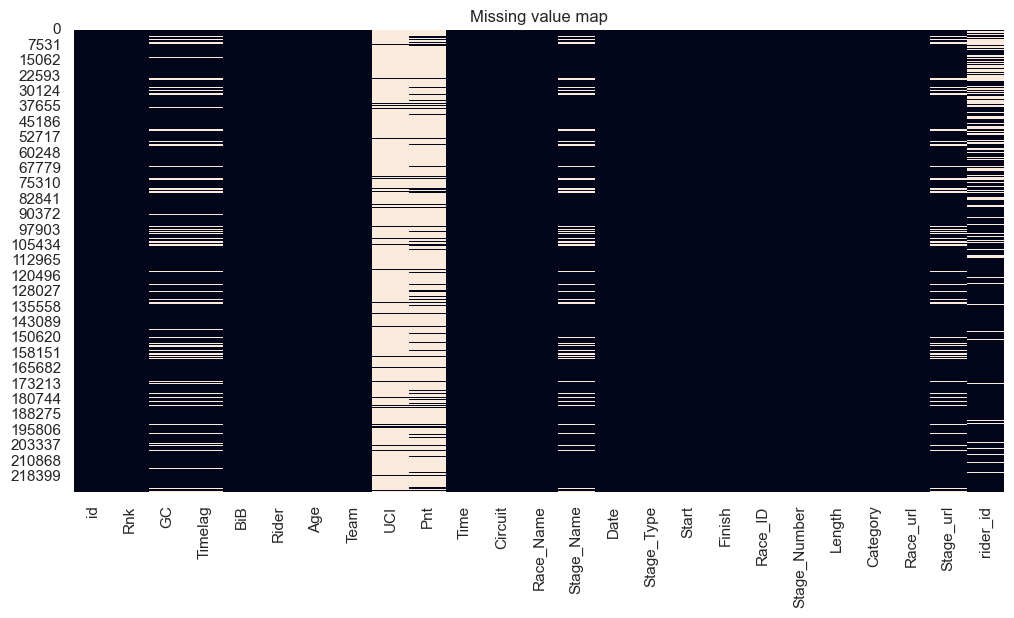

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(df_race_results.isna(), cbar=False)
plt.title("Missing value map")

## Structuur, datatypes en compleetheid van `riders`

De tabel `riders` bevat **1.042 entries** en **10 features**, waarbij elke rij één unieke renner representeert. Deze tabel fungeert als een referentietabel en wordt via de sleutel `rider_id` gekoppeld aan de tabel `race_results`.

### Datatypes van features

De meeste features in deze tabel zijn opgeslagen als **categorische variabelen** met het datatype `object`. Hieronder vallen identificerende en beschrijvende kenmerken zoals `rider_id`, `fullname`, `team`, `country` en de URL-gerelateerde kolommen (`rider_url`, `pps`, `rdr`).

De kolom `birthdate` is eveneens als `object` opgeslagen, hoewel deze in essentie een **datumvariabele** is. Voor tijdsgebonden analyses, zoals het berekenen van leeftijd op wedstrijddatum, zal deze kolom geconverteerd moeten worden naar een `datetime`-type.

Daarnaast bevat de tabel twee **numerieke features**: `height` en `weight`, beide opgeslagen als `float64`. Deze variabelen zijn geschikt voor directe statistische analyse en kunnen gebruikt worden om fysieke kenmerken van renners te onderzoeken. Bij nadere inspectie vallen echter enkele onrealistische waarden op:
- **71 renners** hebben een gewicht tussen **0 en 5 kg**.  
- **54 observaties** hebben een lengte tussen **0.0 en 0.2 meter**.  

Deze waarden suggereren dat er mogelijk fouten zijn ontstaan bij het invoeren of importeren van de gegevens. In de preprocessingfase zullen deze observaties behandeld moeten worden, bijvoorbeeld door correctie, verwijdering of markering als ontbrekende waarden (`NaN`).

### Compleetheid van de data

In tegenstelling tot `race_results` is de tabel `riders` **volledig gevuld** voor alle features, wat de tabel bijzonder geschikt maakt als stabiele bron van achtergrondinformatie bij het verrijken van de wedstrijduitslagen via joins.

### Conclusie

De tabel `riders` is compact en overzichtelijk, met vrijwel volledig ingevulde gegevens. De belangrijkste aandachtspunten voor preprocessing zijn:
- Het converteren van datumvelden (`birthdate`) naar het juiste datatype;  
- Het standaardiseren van categorische waarden;  
- Het aanpakken van onrealistische waarden bij `height` en `weight`.  

Samen met de grotere en complexere tabel `race_results` vormt `riders` een solide basis voor verdere relationele en statistische analyses.


In [28]:
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rider_id   1042 non-null   object 
 1   fullname   1042 non-null   object 
 2   team       1042 non-null   object 
 3   birthdate  1042 non-null   object 
 4   country    1042 non-null   object 
 5   height     1042 non-null   float64
 6   weight     1042 non-null   float64
 7   rider_url  1042 non-null   object 
 8   pps        1042 non-null   object 
 9   rdr        1042 non-null   object 
dtypes: float64(2), object(8)
memory usage: 81.5+ KB


## Missing value map - riders

Text(0.5, 1.0, 'Missing value map')

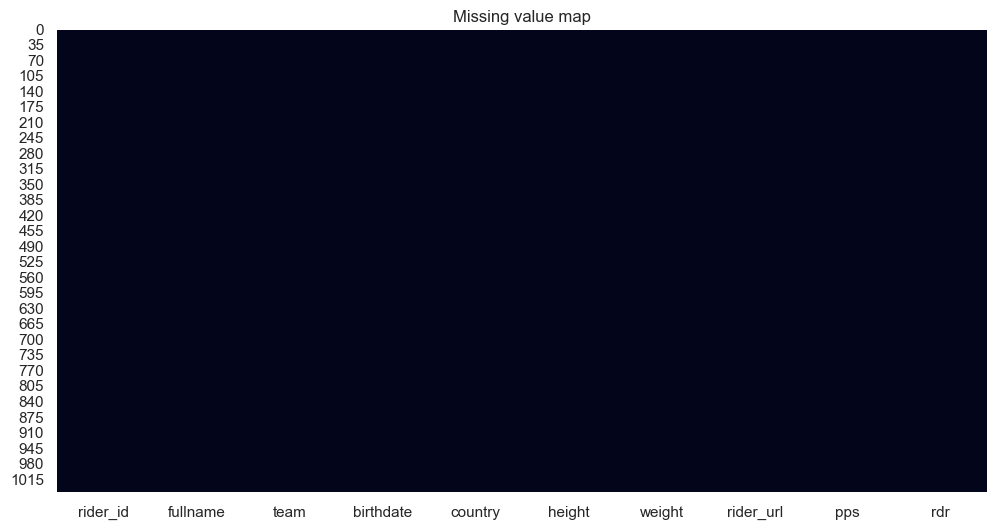

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df_riders.isna(), cbar=False)
plt.title("Missing value map")

## Exploratory Data Analysis (EDA)

### Distributies van numerieke variabelen

Voor numerieke variabelen zoals `Age`, `height` en `weight` zijn histogrammen gebruikt.
Histogrammen geven inzicht in de verdeling van data, waaronder spreiding, scheefheid
en veelvoorkomende waarden. Dit is belangrijk om te beoordelen of variabelen geschikt
zijn voor statistische analyse en machine-learningmodellen.

De histogrammen laten zien dat sommige variabelen geen realistische verdeling hebben,
wat wijst op mogelijke datakwaliteitsproblemen.

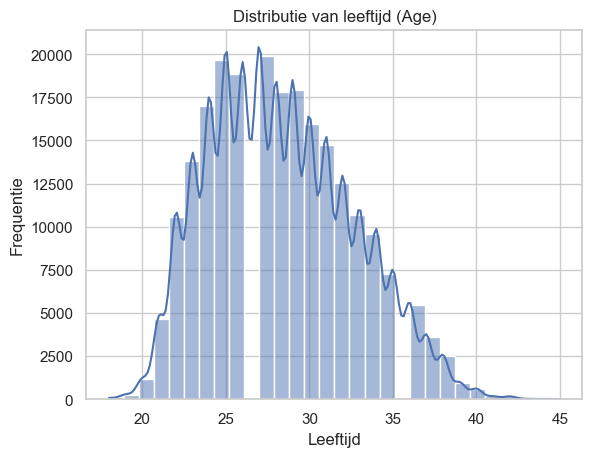

In [30]:
plt.figure()
sns.histplot(df_race_results["Age"], bins=30, kde=True)
plt.title("Distributie van leeftijd (Age)")
plt.xlabel("Leeftijd")
plt.ylabel("Frequentie")
plt.show()


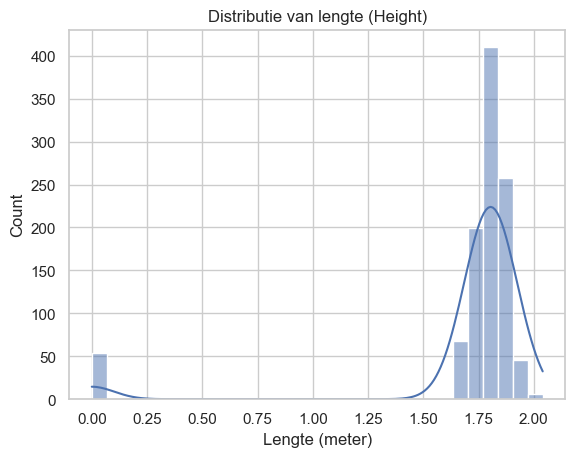

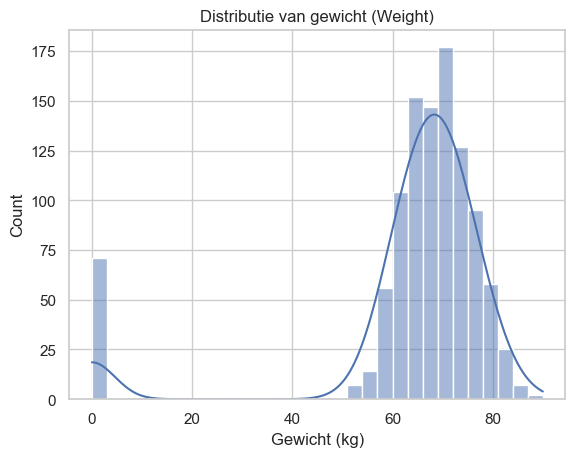

In [31]:
plt.figure()
sns.histplot(df_riders["height"], bins=30, kde=True)
plt.title("Distributie van lengte (Height)")
plt.xlabel("Lengte (meter)")
plt.show()

plt.figure()
sns.histplot(df_riders["weight"], bins=30, kde=True)
plt.title("Distributie van gewicht (Weight)")
plt.xlabel("Gewicht (kg)")
plt.show()


### Outlier-detectie met boxplots

Om uitschieters te identificeren zijn boxplots toegepast op `height` en `weight`.
Boxplots zijn bijzonder geschikt voor het detecteren van outliers, omdat zij extreme
waarden visueel benadrukken.

Deze visualisaties bevestigen de aanwezigheid van onrealistische waarden, zoals zeer
lage lengtes en gewichten, die tijdens de preprocessingfase gecorrigeerd of verwijderd
moeten worden.

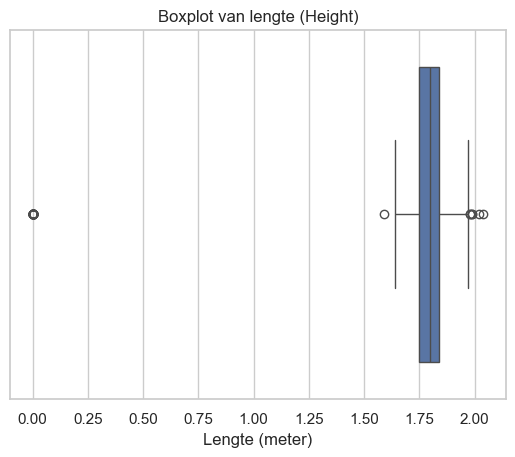

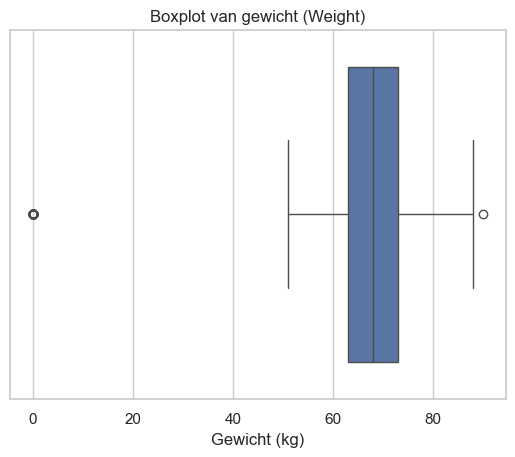

In [32]:
plt.figure()
sns.boxplot(x=df_riders["height"])
plt.title("Boxplot van lengte (Height)")
plt.xlabel("Lengte (meter)")
plt.show()

plt.figure()
sns.boxplot(x=df_riders["weight"])
plt.title("Boxplot van gewicht (Weight)")
plt.xlabel("Gewicht (kg)")
plt.show()


### Categorische verdelingen

Voor categorische variabelen zoals `Stage_Type` is een barplot gebruikt. Deze plot
toont hoe vaak elke categorie voorkomt en maakt inzichtelijk of er sprake is van
klasse-imbalance binnen de dataset.

Barplots zijn geschikt voor categorische data omdat zij frequenties direct en
intuïtief weergeven.

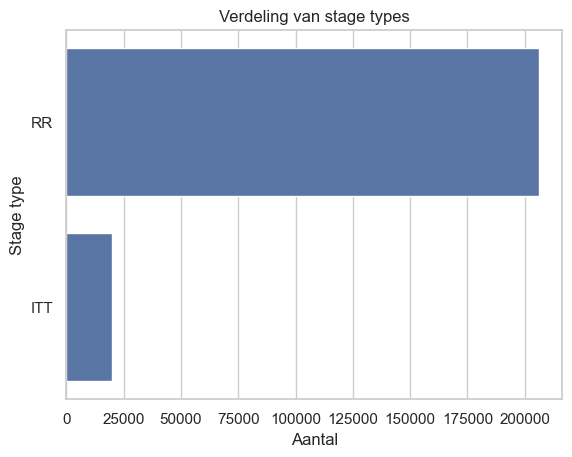

In [33]:
plt.figure()
sns.countplot(
    y="Stage_Type",
    data=df_race_results,
    order=df_race_results["Stage_Type"].value_counts().index
)
plt.title("Verdeling van stage types")
plt.xlabel("Aantal")
plt.ylabel("Stage type")
plt.show()


### Relaties tussen features

Om de relatie tussen fysieke kenmerken te analyseren is een scatterplot gebruikt
voor `height` en `weight`. Scatterplots maken het mogelijk om correlaties,
patronen en afwijkende observaties te identificeren.

De plot toont een verwachte positieve relatie tussen lengte en gewicht, maar ook
afwijkingen die wijzen op foutieve of onvolledige data.

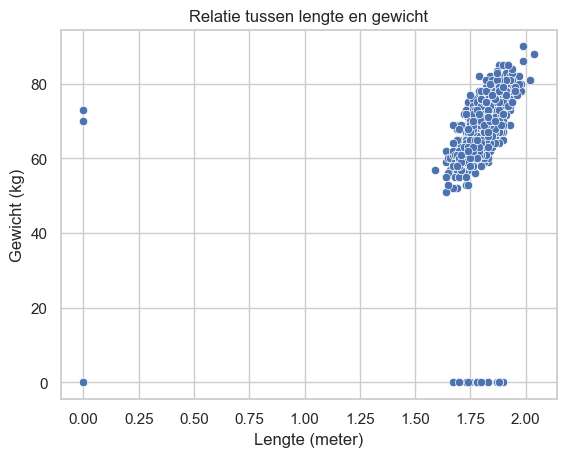

In [34]:
plt.figure()
sns.scatterplot(
    x="height",
    y="weight",
    data=df_riders
)
plt.title("Relatie tussen lengte en gewicht")
plt.xlabel("Lengte (meter)")
plt.ylabel("Gewicht (kg)")
plt.show()


Om de relatie tussen lengte en gewicht beter te kunnen analyseren, is naast een
scatterplot met alle observaties ook een gefilterde versie gemaakt. Hierbij zijn
onrealistische waarden voor lengte en gewicht uitgesloten.

Lengtes kleiner dan 1.4 meter of groter dan 2.1 meter en gewichten lager dan
40 kg of hoger dan 120 kg zijn verwijderd, aangezien deze waarden niet plausibel
zijn voor professionele wielrenners.

De gefilterde scatterplot toont een duidelijkere positieve relatie tussen lengte
en gewicht en voorkomt dat foutieve data de interpretatie van het patroon
verstoort. Deze stap illustreert het belang van datacleaning voorafgaand aan
verdere analyse of modellering.


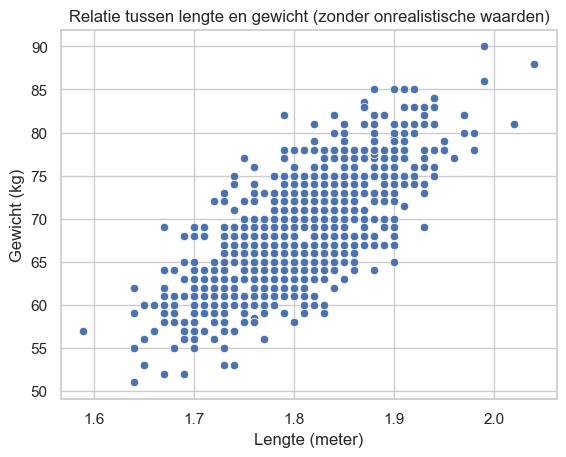

In [35]:
df_riders_clean = df_riders[
    (df_riders["height"] >= 1.4) & (df_riders["height"] <= 2.1) &
    (df_riders["weight"] >= 40) & (df_riders["weight"] <= 120)
]

plt.figure()
sns.scatterplot(
    x="height",
    y="weight",
    data=df_riders_clean
)
plt.title("Relatie tussen lengte en gewicht (zonder onrealistische waarden)")
plt.xlabel("Lengte (meter)")
plt.ylabel("Gewicht (kg)")
plt.show()


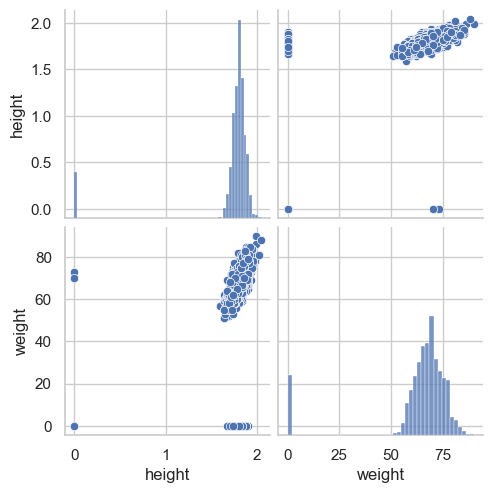

In [36]:
sns.pairplot(df_riders)

### Samenvatting

De uitgevoerde EDA toont aan dat de dataset rijk is aan informatie, maar ook
datacleaning vereist. De visualisaties ondersteunen beslissingen met betrekking tot
imputatie, outlier-verwijdering en verdere preprocessing.

## Data Quality Assessment

De kwaliteit van de dataset is beoordeeld aan de hand van verschillende
data quality indicators, waaronder completeness, validity, consistency en
referential integrity.

### Completeness
De tabel `race_results` bevat meerdere kolommen met ontbrekende waarden,
waaronder `GC`, `Pnt`, `Stage_Name` en `rider_id`. Dit wijst erop dat niet
alle informatie voor elke renner of wedstrijd beschikbaar is. De tabel
`riders` daarentegen is volledig gevuld en bevat geen ontbrekende waarden.

### Validity
Tijdens de verkennende data-analyse zijn onrealistische waarden aangetroffen
in de fysieke kenmerken van renners. Zo zijn er observaties met een gewicht
tussen 0 en 5 kilogram en lengtes tussen 0.0 en 0.2 meter. Deze waarden zijn
niet fysiek plausibel en worden beschouwd als ongeldige data.

### Consistency
Verschillende variabelen die numerieke of temporele informatie representeren,
zoals `birthdate`, `Date`, `Time` en `Timelag`, zijn opgeslagen als tekst
(`object`). Dit leidt tot inconsistenties in datatypes en vereist conversie
tijdens de preprocessingfase.

### Referential Integrity
Hoewel `rider_id` bedoeld is als foreign key naar de tabel `riders`, ontbreekt
deze waarde in een deel van de observaties in `race_results`. Dit kan gevolgen
hebben voor joins en relationele analyses.


## Data Preparation Actions

Op basis van de database-analyse, EDA en data quality assessment zijn de volgende
voorbereidende stappen noodzakelijk om de dataset geschikt te maken voor verdere
analyse en machine learning.

1. **Datatype-conversie**  
   Variabelen die temporele of numerieke informatie bevatten maar als tekst zijn
   opgeslagen (zoals `birthdate`, `Date`, `Time` en `Timelag`) dienen geconverteerd
   te worden naar geschikte datatypes (`datetime` of numeriek).

2. **Omgaan met ontbrekende waarden**  
   Kolommen met missende waarden, zoals `GC`, `Pnt`, `Stage_Name` en `rider_id`,
   vereisen een bewuste strategie. Afhankelijk van het gebruik kunnen deze waarden
   worden geïmputeerd, genegeerd of leiden tot het verwijderen van observaties.

3. **Correctie van onrealistische waarden (outliers)**  
   Onrealistische waarden voor `height` en `weight` moeten worden behandeld door
   deze te corrigeren, te verwijderen of als ontbrekende waarden (`NaN`) te markeren
   om vertekening van analyses te voorkomen.

4. **Normalisatie en schaalverdeling**  
   Numerieke variabelen met verschillende schalen, zoals lengte, gewicht en leeftijd,
   moeten genormaliseerd of gestandaardiseerd worden om eerlijk vergelijkbare input
   te bieden voor machine-learningmodellen.

5. **Encoding van categorische variabelen**  
   Categorische features zoals `team`, `country` en `Stage_Type` dienen te worden
   omgezet naar een numerieke representatie (bijvoorbeeld one-hot encoding of label
   encoding), zodat ze gebruikt kunnen worden in modellen.

6. **Controle van relationele integriteit**  
   Voor analyses waarbij tabellen worden samengevoegd, moet gecontroleerd worden
   of alle foreign keys (`rider_id`) correct en consistent aanwezig zijn.

## Data Readiness for Machine Learning

Of een dataset geschikt is voor machine learning wordt bepaald door meerdere
factoren die samen de betrouwbaarheid en bruikbaarheid van de data garanderen.

Ten eerste moeten alle relevante variabelen het **juiste datatype** hebben.
Machine-learningalgoritmen vereisen numerieke input, waardoor tekstuele
representaties van getallen of datums eerst geconverteerd moeten worden.

Daarnaast moet de dataset **vrij zijn van ontbrekende of ongeldige waarden**, of
moeten deze op een consistente manier zijn afgehandeld via imputatie of filtering.
Onbehandelde missende waarden kunnen leiden tot foutieve of instabiele modellen.

Ook is het belangrijk dat de data **geen extreme outliers** bevat die het leerproces
van een model kunnen verstoren. De aanwezigheid van dergelijke waarden kan leiden
tot overfitting of scheve voorspellingen.

Verder moeten numerieke variabelen **vergelijkbaar geschaald** zijn. Zonder
normalisatie kunnen variabelen met grote waarden onevenredig veel invloed hebben
op het model.

Tot slot moet de dataset **consistent en representatief** zijn voor het probleem
dat wordt gemodelleerd. Dit betekent onder andere dat categorische waarden
gestandaardiseerd zijn en dat de relatie tussen tabellen correct behouden blijft.

Wanneer aan deze voorwaarden is voldaan, kan de dataset worden beschouwd als
geschikt voor verdere analyse en toepassing binnen machine learning.

Bronnen:
- Moesker, N. (2025, 17 juni). What is Data Preparation for Machine Learning? DataNorth AI. https://datanorth.ai/blog/what-is-data-preparation   
- Novogroder, I. (2025, 20 oktober). Data preprocessing in Machine learning: steps & best practices. lakeFS. https://lakefs.io/blog/data-preprocessing-in-machine-learning/

# Data Cleaning

Om de datasets geschikt te maken voor analyse en machine learning zijn de volgende schoonmaakstappen uitgevoerd:

- Numerieke kolommen zoals `Rnk`, `GC`, `UCI`, `Pnt` etc. worden geconverteerd naar numerieke types. Corrupte waarden worden omgezet naar `NaN`.
- De kolom `Time` wordt geconverteerd naar seconden (`Time_sec`) voor makkelijke berekeningen en vergelijking.
- Categorische kolommen (`Team`, `Stage_Type`, `Category`, `Stage_Name`) worden uniform gemaakt: alle tekst in lowercase, witruimte verwijderd en lege waarden gemarkeerd als `NaN`.
- Ontbrekende `rider_id` waarden worden gemarkeerd zodat joins met de `riders` tabel correct kunnen worden uitgevoerd.
- In de `riders` tabel worden team- en landnamen opgeschoond (lowercase + strip + `noteam` → `NaN`).
- De `birthdate` kolom in `riders` en `Date` kolom in `race_results` worden geconverteerd naar datetime voor berekening van leeftijden en tijdsanalyses.


In [37]:
# Numerieke kolommen omzetten
numeric_cols = ["Rnk", "GC", "UCI", "Pnt", "Circuit", "Race_ID", "Stage_Number"]
for col in numeric_cols:
    df_race_results[col] = pd.to_numeric(df_race_results[col], errors="coerce")

# Converteer Time naar seconden
df_race_results["Time_sec"] = pd.to_timedelta(df_race_results["Time"], errors="coerce").dt.total_seconds()

# Categorieën opschonen
categorical_cols = ["Team", "Stage_Type", "Category", "Stage_Name"]
for col in categorical_cols:
    df_race_results[col] = df_race_results[col].astype(str).str.strip().str.lower().replace({"": pd.NA})

# Ontbrekende rider_id markeren
df_race_results["rider_id"] = df_race_results["rider_id"].replace({"": pd.NA})

# Riders tabel opschonen
df_riders["team"] = df_riders["team"].replace({"noteam": pd.NA}).str.lower().str.strip()
df_riders["country"] = df_riders["country"].str.lower().str.strip()

# Converteer datums
df_riders["birthdate"] = pd.to_datetime(df_riders["birthdate"], errors="coerce")
df_race_results["Date"] = pd.to_datetime(df_race_results["Date"], errors="coerce")


## Outlier-detectie en behandeling (validity)

Onrealistische waarden voor lengte en gewicht zijn behandeld door deze te
markeren als ontbrekende waarden (`NaN`). Hierbij zijn plausibele grenzen
gehanteerd op basis van fysieke kenmerken van professionele wielrenners.


In [38]:
df_riders.loc[
    (df_riders["height"] < 1.4) | (df_riders["height"] > 2.1),
    "height"
] = pd.NA

df_riders.loc[
    (df_riders["weight"] < 40) | (df_riders["weight"] > 120),
    "weight"
] = pd.NA

## Omgaan met onbrekende waarden

Ontbrekende waarden in numerieke variabelen zoals `height` en `weight` zijn
geïmputeerd met de mediaan. De mediaan is robuust ten opzichte van uitschieters
en daarom geschikt in dit geval.

Voor variabelen zoals `GC` en `Pnt` is bewust gekozen om geen imputatie toe te
passen, omdat het ontbreken van deze waarden betekenisvol is (bijvoorbeeld
geen klassement of geen punten toegekend).


In [39]:
df_riders["height"] = df_riders["height"].fillna(df_riders["height"].median())
df_riders["weight"] = df_riders["weight"].fillna(df_riders["weight"].median())

## Normalisatie van numerieke variabelen

Numerieke variabelen zijn gestandaardiseerd met behulp van z-score normalisatie.
Dit zorgt ervoor dat alle variabelen een vergelijkbare schaal hebben, wat
essentieel is voor veel machine-learningalgoritmen.


In [40]:
scaler = StandardScaler()

df_riders[["height", "weight"]] = scaler.fit_transform(
    df_riders[["height", "weight"]]
)


Na het uitvoeren van de data cleaning-stappen:
- Zijn datatypes gecorrigeerd;
- Zijn onrealistische waarden verwijderd of geïmputeerd;
- Is de dataset vrij van kritieke outliers;
- Zijn numerieke variabelen genormaliseerd;
- En is de dataset consistent en geschikt gemaakt voor verdere analyse en
  toepassing in machine learning.


## Opslaan van de bewerkte data

Na het uitvoeren van de data cleaning-stappen is de bewerkte dataset opgeslagen als CSV-bestanden in de projectmap `data`. Hierdoor kan de schone data eenvoudig worden hergebruikt voor verdere analyses of machine learning.

In [ ]:
#df_riders.to_csv("data/riders_clean.csv", index=False)
#df_race_results.to_csv("data/race_results_clean.csv", index=False)

# Conclusie

Na een uitgebreide analyse van de wielerwedstrijd-database is de structuur, kwaliteit en verdelingen van de data grondig onderzocht. De belangrijkste inzichten zijn:

- De tabel `race_results` is groot en complex, met enkele missende waarden in kolommen zoals `GC`, `Pnt` en `rider_id`. De tabel `riders` is daarentegen volledig en betrouwbaar voor achtergrondinformatie over de renners.
- Onrealistische waarden in fysieke kenmerken (lengte en gewicht) zijn geïdentificeerd en behandeld, waardoor de dataset geschikt is voor statistische analyse en machine learning.
- Categorische variabelen zijn opgeschoond en numerieke variabelen genormaliseerd, zodat de data klaar is voor modellering.
- Visualisaties (histogrammen, boxplots, scatterplots, countplots) hebben zowel patronen als outliers inzichtelijk gemaakt, wat de keuzes in data cleaning ondersteunt.

## Beperkingen

- Sommige kolommen in `race_results` bevatten nog missende waarden die betekenisvol kunnen zijn en daarom niet automatisch zijn ingevuld.
- De dataset bevat een lange tijdspanne, waardoor tijdgebonden trends en veranderingen in rennersprestaties mogelijk effect hebben op modellen.

## Waarom encoding nog niet is toegepast

Hoewel de dataset nu volledig is opgeschoond en genormaliseerd, zijn de categorische variabelen nog niet gecodeerd. Encoding wordt pas later toegepast, direct voor machine learning, zodat:

- Alle categorieën consistent en uniek zijn (spaties en inconsistenties zijn verwijderd tijdens cleaning).
- Missende waarden correct kunnen worden afgehandeld voordat ze invloed hebben op modeltraining.
- De juiste vorm van encoding kan worden gekozen afhankelijk van het type model (label encoding voor boomgebaseerde modellen, one-hot encoding voor lineaire modellen).

## Volgende stappen

Het businessdoel is een model te bouwen dat kan voorspellen of een renner in een toekomstige wedstrijd in de top 15 zal eindigen. De voorbereide dataset is nu klaar voor:

1. Feature engineering, zoals het berekenen van leeftijd op wedstrijddatum of het samenvatten van eerdere prestaties.
2. Train-test splits en het trainen van classificatiemodellen.
3. Evaluatie van modelprestaties en het verfijnen van feature selectie op basis van voorspellingen.

Door deze stappen te volgen, zijn alle keuzes in data-analyse, cleaning en voorbereiding duidelijk gekoppeld aan het uiteindelijke businessdoel van het voorspellen van rennersprestaties.


# Deel 2

Het doel van deze opdracht is om te onderzoeken hoe dimensiereductietechnieken en clustering toegepast kunnen worden om de kwaliteit en interpretatie van de data te verbeteren. Hierbij wordt geanalyseerd in hoeverre deze technieken kunnen helpen bij het vereenvoudigen van complexe datasets en het ontdekken van onderliggende patronen en structuren.

## Data Preparation & Feature Engineering (na feedback deel 1)

Naar aanleiding van de feedback op deel 1 van de opdracht zijn aanpassingen doorgevoerd in de datavoorbereiding en feature engineering. Het doel van deze verbeteringen is het vergroten van de kwaliteit, consistentie en bruikbaarheid van de dataset voor het trainen van een machine learning model dat voorspelt of een renner in de top 15 eindigt.

### Samenvoegen van datasets
De datasets `race_results` en `riders` zijn samengevoegd op basis van de kolom `rider_id`. Hierbij is gekozen voor een *left join*, waarbij `race_results` als leidende dataset fungeert. Deze keuze zorgt ervoor dat alle race-resultaten behouden blijven en dat beschikbare rennersinformatie wordt toegevoegd zonder observaties te verliezen.

### Opschonen van kolommen
Op basis van de feedback zijn kolommen verwijderd die geen directe voorspellende waarde hebben voor het model, zoals identifiers, namen, URLs en overige tekstuele kenmerken. Het verwijderen van deze kolommen voorkomt ruis en mogelijke datalekken en resulteert in een overzichtelijke en modelgerichte dataset.

### Feature selectie
De uiteindelijke feature set bestaat uit:

- **Numerieke kenmerken:**  
  `Age`, `Length`, `height` (genormaliseerd), `weight` (genormaliseerd), `pps_one_day`, `pps_gc`, `pps_time_trial`, `pps_sprint`, `pps_climber`
- **Categorisch kenmerk:**  
  `country`

De PPS-features (Points per Specialty) zijn toegevoegd omdat deze een samenvatting vormen van historische prestaties en specialisaties van renners, wat relevant is voor het voorspellen van race-uitkomsten.

### Omgaan met ontbrekende waarden
Omdat niet elke renner voorkomt in de `riders` dataset, bevat de samengevoegde dataset ontbrekende waarden. Deze zijn als volgt afgehandeld:

- Numerieke features zijn geïmputeerd met de **mediaan**, omdat deze methode robuust is voor uitschieters.

### Encoding en normalisatie
- Lengte en gewicht zijn genormaliseerd om schaalverschillen tussen features te beperken en de modelprestaties te verbeteren.

### Resultaat
Door deze aanpassingen, uitgevoerd op basis van de ontvangen feedback, is een verbeterde en machine-learning-klare dataset verkregen die geschikt is voor verdere modellering en evaluatie.


In [42]:
import ast

df_riders["pps_dict"] = df_riders["pps"].apply(ast.literal_eval)

pps_df = df_riders["pps_dict"].apply(pd.Series)

# Kolommen hernoemen
pps_df = pps_df.rename(columns={
    "One day races": "pps_one_day",
    "GC": "pps_gc",
    "Time trial": "pps_time_trial",
    "Sprint": "pps_sprint",
    "Climber": "pps_climber"
})

# Omzetten naar numeriek
pps_df = pps_df.astype(int)

# Toevoegen aan originele dataframe
df_riders = pd.concat([df_riders, pps_df], axis=1)

# Optioneel: oude kolommen verwijderen
df_riders = df_riders.drop(columns=["pps", "pps_dict"])

df_riders.to_csv("data/riders_clean.csv", index=False)


In [43]:
df_combined = df_race_results.merge(
    df_riders,
    on="rider_id",
    how="left"  # behoudt alle race_results
)

columns_to_drop = [
    "id", "GC", "Timelag", "BiB", "Rider", "Team", "UCI", "Pnt", "Time",
    "Circuit", "Race_Name", "Stage_Name", "Date", "Stage_Type", "Start",
    "Finish", "Race_ID", "Stage_Number", "Category", "Race_url",
    "Stage_url", "Time_sec", "rider_id", "fullname", "team",
    "birthdate", "rider_url", "rdr", "country",
]

df_full = df_combined.drop(columns=columns_to_drop)

num_cols = [
    "height", "weight",
    "pps_one_day", "pps_gc", "pps_time_trial",
    "pps_sprint", "pps_climber"
]

df_full[num_cols] = df_full[num_cols].fillna(
    df_full[num_cols].median()
)

df_full.to_csv("data/cycling_data_combined.csv", index=False)